# Confusion Matrix

It compares every prediction your classifier makes to the true value of that prediction and outputs the graph



00 - True negative                                                         
01 - False positive (type 1 error)                                             
10  - False negative (type 2 error)                                      
11 - True positive                                                      
TPR -> True positive Rate -> Recall                                        
TNR -> True negative rate -> Specificty -> TN / (TN+FN)                              
FPR -> False positivity rate -> 1 - Specificity

Precision : measure of how often your predictions are accurate,          
precision : TP+(TP+FP)                                               
Accuracy : (TP+TN) /(TP+TN+FP+FN)                                      
Recall/Sensitivity : TP/(TP+FN)


Instead of finding the precision and recall values, find the F1 score.
F1 score is the harmonic mean of precision and recall.
HM because it gives preference to lower values. It favours the classifiers that have same precision and recall.

## Precison and Recall Tradeoff

Many classification algorithms will take each instance and give it a score, and classify each instance by placing it on a category based on the score reeived. If the score is above certain threshold then the prediction belongs in one category, if its below the threshold, it belongs to another category

If you increase the threshold for your algo, you will increase the precision at the cost of recall, in simple terms it means that it makes the algo stricter and stricter to classify the things into positive class.                                             

If you reduce the threshold for your algo, you will decrease the precision at the cost of recall, in simple terms, things get easily classified into accurate manner

## ROC Curve

Receiver operating characteristic curve, It is used for binary classifiers. Plots the TPR-True positive rate (recall) against the FPR(False Positive Rate).
Quantify the measure using AUC -> area under curve

## From the book :
You should prefer the PR curve(Precision recall curve) whenever the positive class is rare or when you care most about the false positives than the false negatives. Otherwise use the ROc curve

# Binary Classifier :
are used to seperate two different classes from each other.

# Lets get started with the wine dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data_import = pd.read_csv("../Datasets/Chapter 3 - wine.csv")
data_import.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

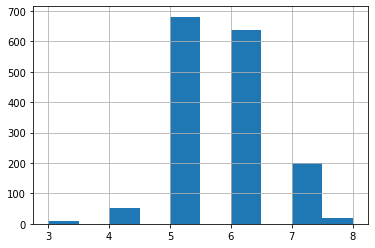

In [31]:
data_import['quality'].hist()

## wine greater than 5 as good one and less than 5 as bad one

In [32]:
y = data_import['quality']>5


In [33]:
X = data_import.drop('quality', axis=1)
X

## or 
## X = data_import.iloc[:,:-1] ## all rows and all cols exclusing the last one

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [34]:
X.info()
## no categorical variables and no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [35]:
data_import.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [37]:
## not lets scale the datasts
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_trained = scaler.fit_transform(X_train)
## fitting and transform in one step
scaled_X_trained

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [38]:
## same goes for X_test

## no need to fit_transform here as already the scaler function has gained the info on
## fitting the data

scaled_X_test = scaler.transform(X_test)
scaled_X_test

array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01, ...,
        -4.65392578e-01, -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01, ...,
         5.08915214e-01, -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01, ...,
        -2.05577167e-01,  1.83329452e+00, -4.92358280e-01],
       ...,
       [-1.37449586e-02,  3.87494284e-01, -1.15015218e-01, ...,
        -1.04997725e+00, -7.44964886e-01, -5.87389780e-01],
       [ 2.76350785e-01, -1.45397070e+00,  6.01568807e-01, ...,
        -1.04997725e+00,  1.71749571e-01,  7.43051230e-01],
       [ 4.50408230e-01,  1.30822677e+00, -1.18989125e+00, ...,
        -1.40623314e-01, -6.87670232e-01, -6.82421281e-01]])

In [39]:
## just do the same on the x-test set
## so instead of that just create a function for the same
## problem solved

def preprocessing_function(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
    scaled_X_trained = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    return scaled_X_trained, scaled_X_test, y_train, y_test
    

In [47]:
## suport vector machine

from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(scaled_X_trained, y_train)


SVC()

In [48]:
svc_clf_predictions = svc_clf.predict(scaled_X_test)
svc_clf_predictions

array([False, False,  True, False,  True, False, False, False,  True,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False, False, False,  True,  True, False,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True,

array([[109,  32],
       [ 41, 138]], dtype=int64)

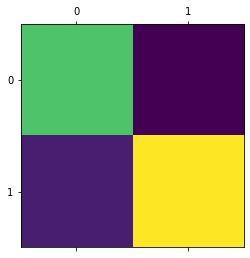

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score

plt.matshow(confusion_matrix(y_test, svc_clf_predictions))
confusion_matrix(y_test, svc_clf_predictions)

## u want to change the color of the matrix, use cmap in plt.matshow() function

In [52]:
accuracy_score(y_test, svc_clf_predictions)

0.771875

In [51]:
precision_score(y_test, svc_clf_predictions)

0.8117647058823529

In [53]:
recall_score(y_test, svc_clf_predictions)

0.770949720670391

In [65]:
def algo_accuracy(y_test, predictions):
    confusionMatrix = confusion_matrix(y_test, predictions)
    accuracy = accuracy_score(y_test,predictions)
    precision = precision_score(y_test,predictions)
    recall = recall_score(y_test,predictions)

    return confusionMatrix, accuracy, precision,recall

In [60]:
## lets apply GridSearch on the same

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    ## lets try 12(3*4) combinations of hyper-parameters

    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},

    ## now try 6(2*3) with bootstrap set as false

    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
]

rfc = RandomForestClassifier()

## total  (12+6)*5 = 90 rounds of training for 5 cv folds
grid_search = GridSearchCV(rfc,param_grid,cv=5,scoring='accuracy',return_train_score=True)

grid_search.fit(scaled_X_trained,y_train)



## if you want to run the same gridsearch cv on svc classifier
## remove the max_features 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [61]:
rfc_clf  = grid_search.best_estimator_

In [62]:
rfc_clf

RandomForestClassifier(max_features=8, n_estimators=30)

In [63]:
rfc_predictions = rfc_clf.predict(scaled_X_test)

In [66]:
algo_accuracy(y_test, rfc_predictions)

(array([[107,  34],
        [ 36, 143]], dtype=int64),
 0.78125,
 0.807909604519774,
 0.7988826815642458)